Plot generated: drift_spectrum_v15.png


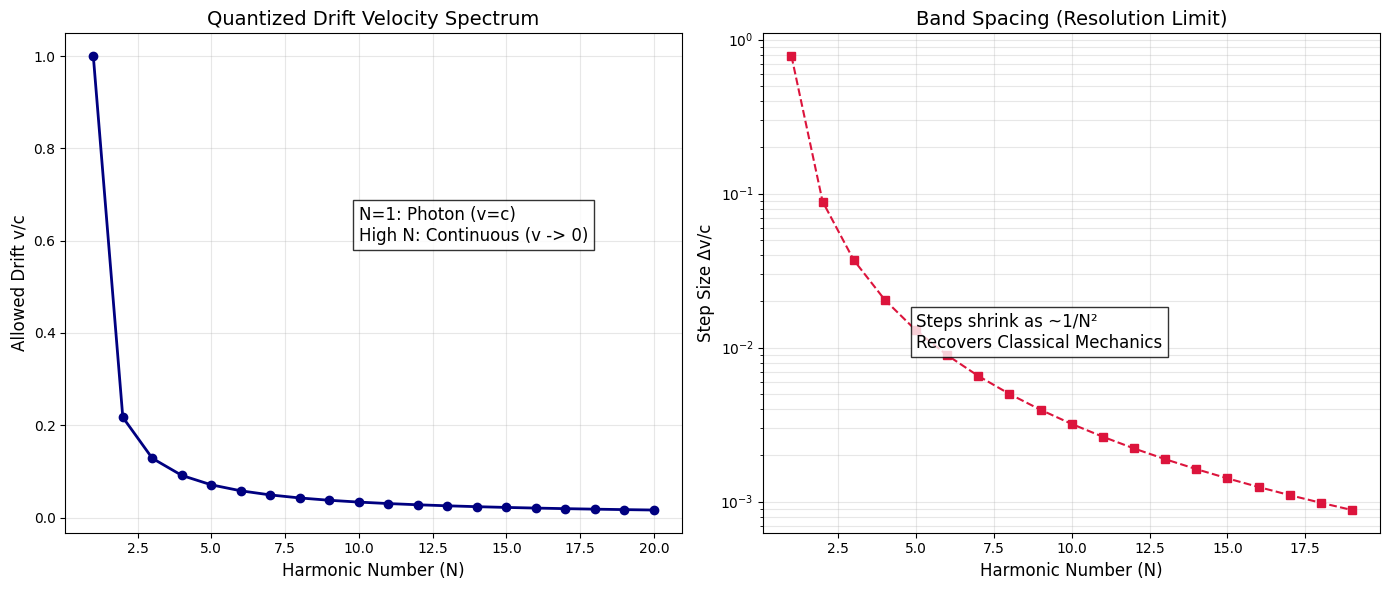

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def plot_drift_spectrum():
    """
    Generates the 'Drift Quantization' plot for the whitepaper.
    Visualizes how allowed velocities become continuous as N -> Infinity.
    """

    # 1. Solve for Roots (Strict Mode Stability Equation)
    def equation(m, N):
        # sqrt(1 - m^2) = m * (pi*N - arccos(-m))
        return np.sqrt(1 - m**2) - m * (np.pi * N - np.arccos(-m))

    N_values = np.arange(1, 21) # N = 1 to 20
    m_values = []
    spacings = []

    for N in N_values:
        guess = 1.0 / (np.pi * N)
        # Fix: Pass N as an extra argument to the solver
        root = fsolve(equation, guess, args=(N,))[0]
        m_values.append(root)

    # Calculate spacings (Delta v)
    for i in range(len(m_values) - 1):
        spacings.append(m_values[i] - m_values[i+1])

    # 2. Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot A: The Spectrum
    ax1.plot(N_values, m_values, 'o-', color='navy', markersize=6, linewidth=2)
    ax1.set_title("Quantized Drift Velocity Spectrum", fontsize=14)
    ax1.set_xlabel("Harmonic Number (N)", fontsize=12)
    ax1.set_ylabel("Allowed Drift v/c", fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.text(10, 0.6, "N=1: Photon (v=c)\nHigh N: Continuous (v -> 0)",
             fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # Plot B: The Spacing (Delta v)
    ax2.plot(N_values[:-1], spacings, 's--', color='crimson', markersize=6)
    ax2.set_title("Band Spacing (Resolution Limit)", fontsize=14)
    ax2.set_xlabel("Harmonic Number (N)", fontsize=12)
    ax2.set_ylabel("Step Size Δv/c", fontsize=12)
    ax2.set_yscale('log')
    ax2.grid(True, which="both", alpha=0.3)
    ax2.text(5, 0.01, "Steps shrink as ~1/N²\nRecovers Classical Mechanics",
             fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.savefig('drift_spectrum_v15.png')
    print("Plot generated: drift_spectrum_v15.png")

if __name__ == "__main__":
    plot_drift_spectrum()